In [179]:
cd '/content/drive/MyDrive/Colab Notebooks/DECODE FUNDS/BANK CHURN PREDICTION'

/content/drive/MyDrive/Colab Notebooks/DECODE FUNDS/BANK CHURN PREDICTION


In [189]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


df = pd.read_csv('Churn_Modelling.csv')  # use the exact filename
copy = df.copy()
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Has Credit Card,Active,101348.88,Exit
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No Credit Card,Active,112542.58,Stay
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Has Credit Card,Not Active,113931.57,Exit
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No Credit Card,Not Active,93826.63,Stay
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Has Credit Card,Active,79084.10,Stay


In [190]:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Data Exploration

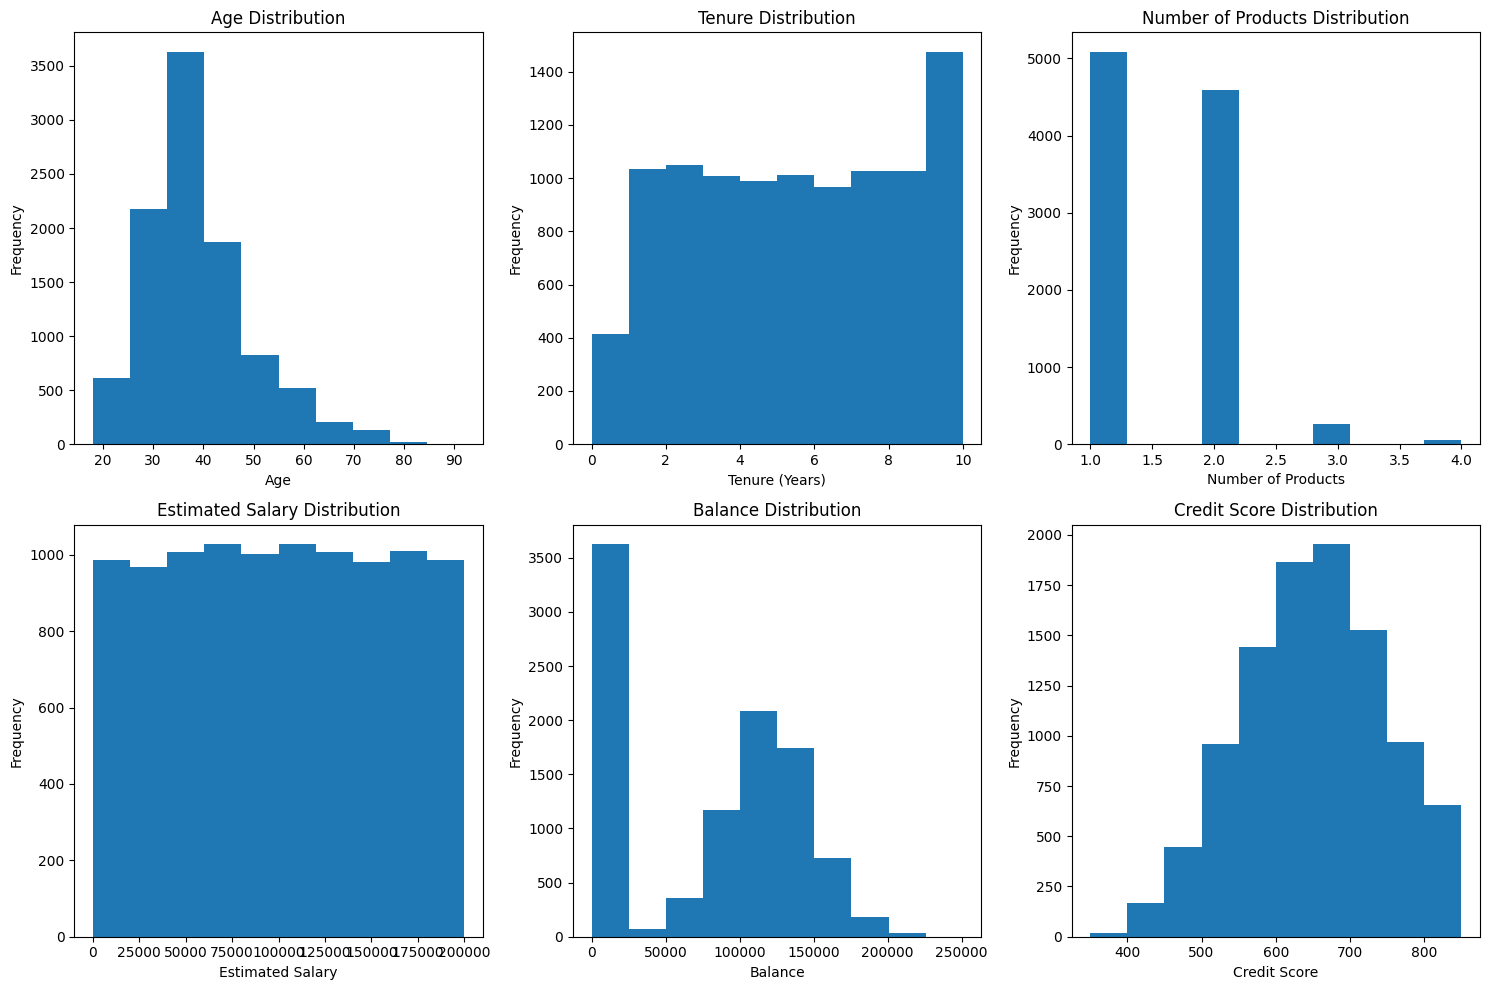

In [54]:
# prompt: create histograms for age, tenure, num of products, estsalary, balance

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
plt.hist(df['Tenure'])
plt.title('Tenure Distribution')
plt.xlabel('Tenure (Years)')
plt.ylabel('Frequency')

plt.subplot(2, 3, 3)
plt.hist(df['NumOfProducts'])
plt.title('Number of Products Distribution')
plt.xlabel('Number of Products')
plt.ylabel('Frequency')

plt.subplot(2, 3, 4)
plt.hist(df['EstimatedSalary'])
plt.title('Estimated Salary Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')

plt.subplot(2, 3, 5)
plt.hist(df['Balance'])
plt.title('Balance Distribution')
plt.xlabel('Balance')
plt.ylabel('Frequency')

plt.subplot(2, 3, 6)
plt.hist(df['CreditScore'])
plt.title('Credit Score Distribution')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Feature Engineer and Data Preparation

## Encode categorical

In [191]:
# 1. Binary encoding
df['IsActiveMember'] = df['IsActiveMember'].map({'Not Active': -1, 'Active': 1})
df['HasCrCard'] = df['HasCrCard'].map({'No Credit Card': -1, 'Has Credit Card': 1})
df['Exited'] = df['Exited'].map({'Stay': 0, 'Exit': 1})  # keep this!

# 2. One-hot encode categorical variables
lst = ['Geography', 'Gender']
for col in lst:
    if df[col].dtype == object:
        for val in df[col].unique():
            df[f'{col}_{val}'] = np.where(df[col] == val, 1, -1)
        df.drop(columns=col, inplace=True)  # drop the original categorical column

# Final check
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,-1,-1,1,-1
1,608,41,1,83807.86,1,-1,1,112542.58,0,-1,1,-1,1,-1
2,502,42,8,159660.80,3,1,-1,113931.57,1,1,-1,-1,1,-1
3,699,39,1,0.00,2,-1,-1,93826.63,0,1,-1,-1,1,-1
4,850,43,2,125510.82,1,1,1,79084.10,0,-1,1,-1,1,-1


## Finding Ratio and Relationship

In [192]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
df['TenureByAge'] = df.Tenure/(df.Age)
df['CreditScoreGivenAge'] = df.CreditScore/(df.Age)

## Normalise

In [193]:
continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']
cat_vars = ['HasCrCard', 'IsActiveMember','Geography', 'Gender']

In [194]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()

# df[continuous_vars] = scaler.fit_transform(
#     df[continuous_vars]
# )


In [195]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_France',
       'Geography_Spain', 'Geography_Germany', 'Gender_Female', 'Gender_Male',
       'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [196]:
# Drop unnecessary columns
# X = df[['CreditScore', 'Age', 'Tenure',
#        'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
#        'EstimatedSalary','Geography_Germany', 'Geography_Spain',
#        'Gender_Male']]

X = df[['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_France',
       'Geography_Spain', 'Geography_Germany', 'Gender_Female', 'Gender_Male',
       'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge']]

y = df['Exited']  # Target: churn (1) or not (0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [197]:
# # Create a copy of the original dataframe with index reset
# df_reset = df.reset_index(drop=True)

# # Create a column 'Set' defaulting to 'Train'
# df_reset['Set'] = 'Train'

# # Tag the rows in the test set
# test_indices = X_test.index
# df_reset.loc[test_indices, 'Set'] = 'Test'
# df_reset.to_csv("Churn_Modelling_With_Set.csv", index=False)
# df_reset

In [198]:
test_indices = X_test.index

# Train model

In [199]:
# important libraries

from sklearn.model_selection import GridSearchCV

# models

from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# metrics

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [200]:
def best_model(model):
  print(model.best_score_)
  print(model.best_params_)
  print(model.best_estimator_)

In [201]:
# from xgboost import XGBClassifier
model = XGBClassifier(scale_pos_weight=4, n_estimators=300, eval_metric='logloss', enable_categorical=True)
model.fit(X_train, y_train)


# rf_model = RandomForestClassifier(
#     max_depth=9,
#     max_features=9,
#     min_samples_split=7,
#     n_estimators=50
# )
# rf_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=True, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=300,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

# Prediction

In [208]:
# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
# Confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

results_df = pd.DataFrame({
    'Exited_GroundTruth': y_test,
    'Exited_Predicted': y_pred,
    'Predicted Churn Score': y_proba
})
results_df.head()

[[1472  135]
 [ 178  215]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      1607
           1       0.61      0.55      0.58       393

    accuracy                           0.84      2000
   macro avg       0.75      0.73      0.74      2000
weighted avg       0.84      0.84      0.84      2000



,Exited_GroundTruth,Exited_Predicted,Predicted Churn Score
6252,0,0,0.000145
4684,0,0,0.000496
1731,0,0,0.073173
4742,0,0,0.019485
4521,0,0,0.018567


In [157]:
# # prompt: save trained model as bank prediction model.pkl

# import joblib

# filename = 'bank prediction model.pkl'
# joblib.dump(model, filename)

# print(f"Model saved as {filename}")

Model saved as bank prediction model.pkl


In [211]:
# Get original test rows from df_raw
test_original = copy.loc[test_indices].copy()

# Add predictions
test_original['Churn Prediction Label'] = y_pred
test_original['Churn Likelihood (%)'] = y_proba * 100
test_original['Churn Prediction'] = test_original['Churn Prediction Label'].map({0: 'Stay', 1: 'Exit'})
test_original.to_csv('churn_test_predictions.csv', index=False)

test_original

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Churn Prediction Label,Churn Likelihood (%),Churn Prediction
6252,6253,15687492,Anderson,596,Germany,Male,32,3,96709.07,2,No Credit Card,Not Active,41788.37,Stay,0,0.014453,Stay
4684,4685,15736963,Herring,623,France,Male,43,1,0.00,2,Has Credit Card,Active,146379.30,Stay,0,0.049553,Stay
1731,1732,15721730,Amechi,601,Spain,Female,44,4,0.00,2,Has Credit Card,Not Active,58561.31,Stay,0,7.317297,Stay
4742,4743,15762134,Liang,506,Germany,Male,59,8,119152.10,2,Has Credit Card,Active,170679.74,Stay,0,1.948502,Stay
4521,4522,15648898,Chuang,560,Spain,Female,27,7,124995.98,1,Has Credit Card,Active,114669.79,Stay,0,1.856725,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6412,6413,15598982,Klein,602,Germany,Female,53,5,98268.84,1,No Credit Card,Active,45038.29,Exit,0,43.392208,Stay
8285,8286,15572631,Ndubuisi,609,France,Male,25,10,0.00,1,No Credit Card,Active,109895.16,Stay,0,0.717479,Stay
7853,7854,15746674,Miller,730,France,Female,47,7,0.00,1,Has Credit Card,Not Active,33373.26,Exit,1,97.965187,Exit
1095,1096,15689081,Wu,692,France,Male,29,4,0.00,1,Has Credit Card,Not Active,76755.99,Exit,0,22.006182,Stay
